## **<center><font style="color:rgb(100,109,254)">Digital Image Processing</font> </center>**
### **<center><font style="color:rgb(100,109,254)">Lab 04</font> </center>**

### **<center><font style="color:rgb(100,109,254)">Image Preprocessing (Edge Detection)</font> </center>**

****

### **<font style="color:rgb(255,0,255)">01. Extracting Colors Channel </font>**

Read the image and extract its color channel as 
* grayscale image
* color images

Then display the images to verify the operations has succeeded.


In [1]:
import cv2
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
path = "C:\\Users\\hp\\Google Drive\\Fiverr Work\\2022\\33. Computer Vision Course\\pictures"

Text(0.5, 1.0, 'Orignal Image')

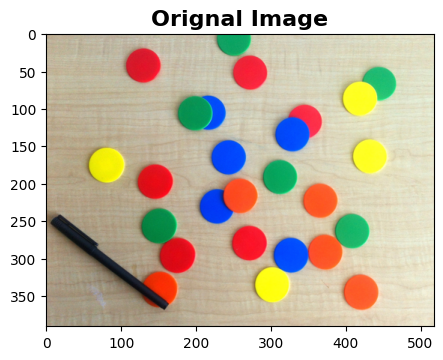

In [3]:
img = cv2.imread(path+"\\coloredChips.png")  # took path and name of image as an argument

RGBImage = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(5,5))
plt.imshow(RGBImage)
plt.title("Orignal Image", fontsize = 16, fontweight = 'bold')



#### Get grayscale image of each channel

In [4]:
def getGrayscaleImages(image):

    b = image[:,:,0]
    g = image[:,:,1]
    r = image[:,:,2]

    return b, g, r

#### Get Colored Image of each channel (First Method)

In [5]:
import numpy as np

def colorChannelImages(image):

    dimension = image.shape
    height, width = dimension[0], dimension[1]

    zeroChannel = np.zeros((height, width), "uint8")

    b, g, r = getGrayscaleImages(image)

    blueImage = cv2.merge([b, zeroChannel, zeroChannel])
    greenImage = cv2.merge([zeroChannel, g, zeroChannel])
    redImage = cv2.merge([zeroChannel, zeroChannel, r])

    return blueImage, greenImage, redImage

(400, 200, 3)


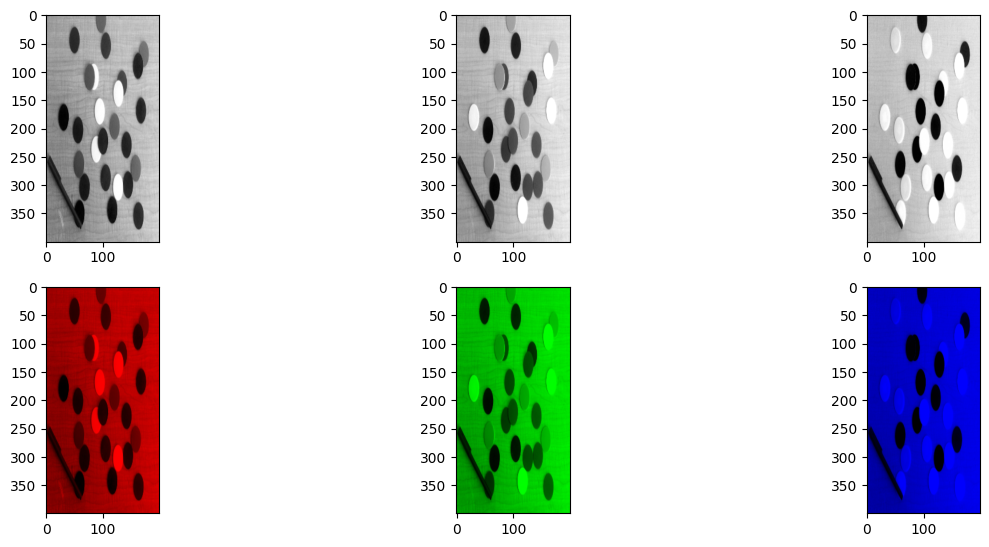

In [22]:
path = "C:\\Users\\hp\\Google Drive\\Fiverr Work\\2022\\33. Computer Vision Course\\pictures"

img = cv2.imread(path+"\\coloredChips.png")
imgResized = cv2.resize(img, (200, 400))

print(imgResized.shape)

b, g, r = getGrayscaleImages(imgResized)
blue, green, red = colorChannelImages(imgResized)

plt.figure(figsize=(15,10))
plt.subplot(3,3,1)
plt.imshow(b, cmap="gray")
plt.subplot(3,3,2)
plt.imshow(g, cmap="gray")
plt.subplot(3,3,3)
plt.imshow(r, cmap="gray")
plt.subplot(3,3,4)
plt.imshow(blue, cmap="gray")
plt.subplot(3,3,5)
plt.imshow(green, cmap="gray")
plt.subplot(3,3,6)
plt.imshow(red, cmap="gray")


In [18]:
grayscalResult = np.hstack((b, g, r))
colorResult = np.hstack((blue, green, red))

cv2.imshow("image", imgResized)
cv2.imshow("grayScale channel Images", grayscalResult)
cv2.imshow("color channel Images", colorResult)

cv2.waitKey()
cv2.destroyAllWindows()

#### Simple method to Extract the channel

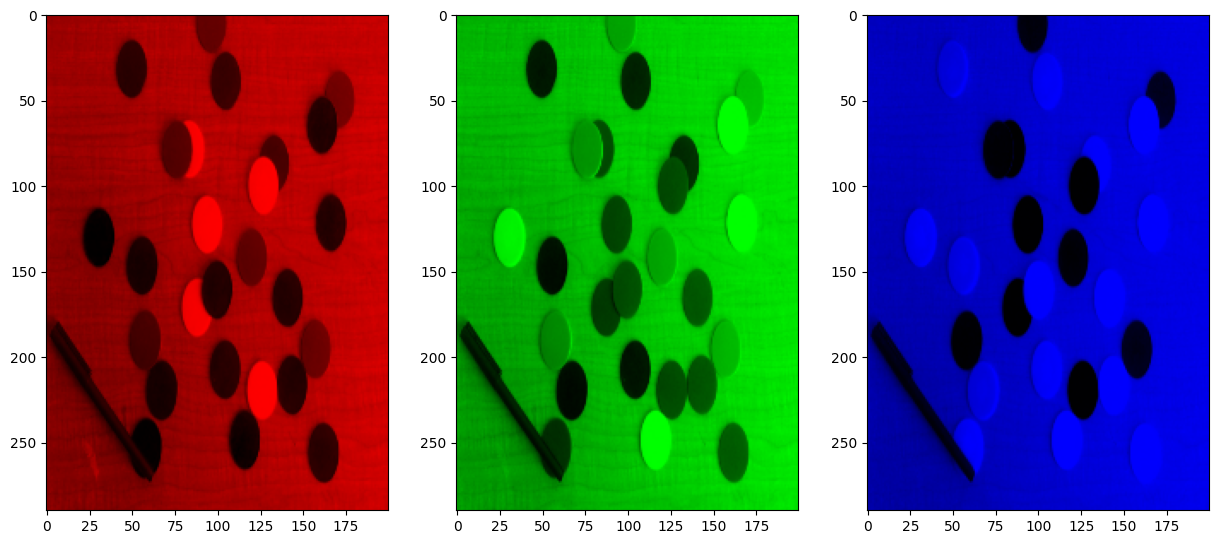

In [23]:
import cv2

path = "C:\\Users\\hp\\Google Drive\\Fiverr Work\\2022\\33. Computer Vision Course\\pictures"

image = cv2.imread(path+"\\coloredChips.png")
# image = cv2.imread(colorStripe)#pass correct object
image =cv2.resize(image, (200,290))
bw,gw,rw=cv2.split(image)#pass correct object

b = image.copy()
# set green and red channels to 0
b[:,:,1] = 0
b[:,:,2] = 0
g = image.copy()
# set blue and red channels to 0
g[:,:,0] = 0
g[:,:,2] = 0
r = image.copy()
# set blue and green channels to 0
r[:,:,0] = 0
r[:,:,1] = 0

plt.figure(figsize=(15,10))
plt.subplot(1,3,1)
plt.imshow(b, cmap="gray")
plt.subplot(1,3,2)
plt.imshow(g, cmap="gray")
plt.subplot(1,3,3)
plt.imshow(r, cmap="gray")


In [24]:
# RGB - Blue
cv2.imshow('B-RGB', b)
cv2.imshow('BW B-RGB', bw)
# RGB - Green
cv2.imshow('G-RGB', g)
cv2.imshow('Gw-RGB', gw)
# RGB - Red
cv2.imshow('R-RGB', r)
cv2.imshow('w-RGB', rw)

cv2.waitKey(0)
cv2.destroyAllWindows()


#### *`cv.THRESH_TRUNC:`* If pixel intensity value is greater than threshold, it is truncated to the threshold. The pixel values are set to be the same as the threshold. All other values remain the same

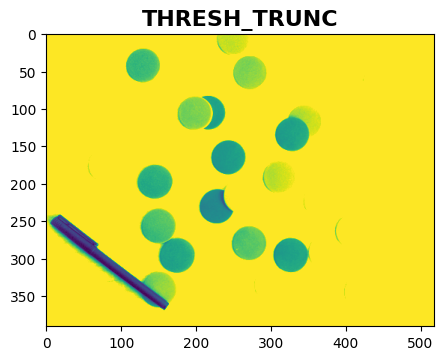

In [51]:
lb = 120
ub = 200
ret, thresh3 = cv2.threshold(imgGray, lb, ub, cv2.THRESH_TRUNC)

plt.figure(figsize=(5,5))
plt.imshow(thresh3)
plt.title("THRESH_TRUNC", fontsize = 16, fontweight = 'bold')

cv2.imshow("THRESH_TRUNC", thresh3)
cv2.waitKey(0)
cv2.destroyAllWindows()

#### *`cv.THRESH_TOZERO:`* Pixel intensity is set to 0, for all the pixels intensity, less than the threshold value.

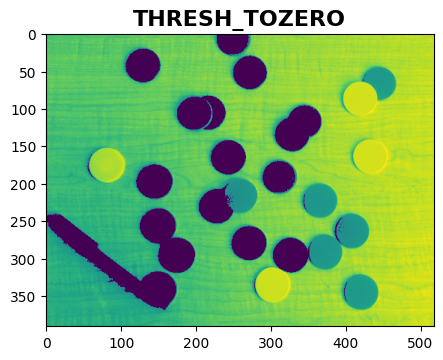

In [52]:
lb = 120
ub = 200
ret, thresh4 = cv2.threshold(imgGray, lb, ub, cv2.THRESH_TOZERO)

plt.figure(figsize=(5,5))
plt.imshow(thresh4)
plt.title("THRESH_TOZERO", fontsize = 16, fontweight = 'bold')

cv2.imshow("THRESH_TOZERO", thresh4)
cv2.waitKey(0)
cv2.destroyAllWindows()

#### *`cv.THRESH_TOZERO_INV`*: Inverted or Opposite case of cv2.THRESH_TOZERO.

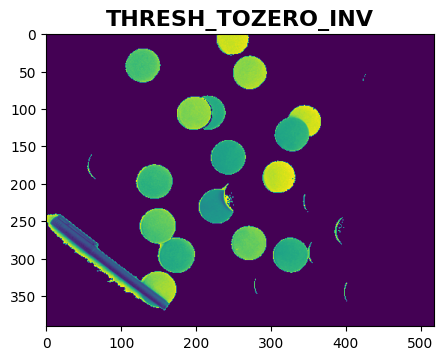

In [53]:
lb = 120
ub = 200
ret, thresh5 = cv2.threshold(imgGray, lb, ub, cv2.THRESH_TOZERO_INV)

plt.figure(figsize=(5,5))
plt.imshow(thresh5)
plt.title("THRESH_TOZERO_INV", fontsize = 16, fontweight = 'bold')

cv2.imshow("THRESH_TOZERO_INV", thresh5)
cv2.waitKey(0)
cv2.destroyAllWindows()

**********

### **<font style="color:rgb(255,0,255)">02. OpenCV namedWindow(), createTrackbar(), getTrackbarPos() Function</font>**

* is used to create a window with a suitable name and size to display images and videos on the screen.


### **`Syntax`**

    cv2.namedWindow(window_name, flag)

* *`window_name:`* Name of the window that will display image/video
* *`flag:`*  Represents if window size is automatically set or adjustable. 

Some of the flag values are:

* *`WINDOW_NORMAL`* – Allows to manually change window size
* *`WINDOW_AUTOSIZE(Default)`* – Automatically sets the window size
* *`WINDOW_FULLSCREEN`* – Changes the window size to fullscreen


### <font style="color:rgb(255,0,0)">createTrackbar(): </font> 

### **`Syntax`**

	cv2.createTrackbar(trackbarName, windowName, DefaultValue, maximumValue, functionNameWhichSimplyPass)
		
E.g.

	cv2.createTrackbar('R', 'image', 0, 255, nothing)
		
*`Return`* nothing

### <font style="color:rgb(255,0,0)">getTrackbarPos(): </font> 

### **`Syntax`**

    cv.getTrackbarPos(trackbarname, winname)

**`Parameters`**

*`trackbarname:`* Name of trackbar
*`winname:`* Name of the window that is the parent of the trackbar.
		
*`Return:`* Current position of the specified trackbar


#### **`Examaple: 1`** I want to change the color of image R, G, and B by using OpenCV trackbar functions

### **<font style="color:rgb(0,255,0)">Full Code</font>**

In [54]:
import cv2 as cv
import numpy as np
		
# you have to create a function which simply do nothing and pass 
# because it is required as fifth argument of createTracbar function
def nothing(x):
    pass
		
# Creating a black image using numpy, with following dimension 400x500x3 
img = np.zeros((200, 600, 3), "uint8")
		
# creating a display window with named "image"  
cv.namedWindow("image")
		
# creating trackbars for red color change, 
# R is name of trackbar, 
# image is name of window on which it will display
# 0 is by default value of trackbar when it start
# 255 is the maximum value of the trackbar 
# nothing is the function created above which simply do nothing and pass, 
# it is requirement of createTrackbar function 
cv.createTrackbar('R', 'image', 0, 255, nothing)
		 
# creating trackbars for Green color change
cv.createTrackbar('G', 'image', 0, 255, nothing)
		 
# creating trackbars for Blue color change
cv.createTrackbar('B', 'image', 0, 255, nothing)
		 
# now i want to get the values of each trackbar 
# for that i need a loop which runs continuously
		 
while True:
		
    # get current positions or value of all Three trackbars
    # R is the name of trackbar created above and 
    # image is the name of window 
    r = cv.getTrackbarPos('R', 'image')
    g = cv.getTrackbarPos('G', 'image')
    b = cv.getTrackbarPos('B', 'image')
	
    # now assign these r, g, and b trackbar value to original image
    img[:] = [b, g, r]
		
    # Now show the created image (img) inside the above created window, 
    # you have to mention the name of window, in this case the name of window is "image"

    cv.imshow("image", img)
    key = cv.waitKey(1)

    if key == ord("q"):
        cv.destroyAllWindows()
        break
    
cv.destroyAllWindows()

#### **`Examaple:2`** - I want to convert the color (cvtColor) using Trackbar

### **<font style="color:rgb(0,255,0)">Full Code</font>**

In [59]:
import cv2 as cv
def nothing(x):
    pass
		
path = "C:\\Users\\hp\\Google Drive\\Fiverr Work\\2022\\15. Teaching OpenCV to Client\\pictures"
	
img = cv.imread(path + "\\eyes.jpg")
		
imgResized = cv.resize(img, (1000, 600))
		
# create a window
cv.namedWindow("image", cv.WINDOW_NORMAL)
		
# [4, 2, 0, 6, 40, 68, 66, 36, 44, 32, 50]
# each color code hase integer value
colorName = [cv.COLOR_BGR2RGB, cv.COLOR_BGR2RGBA, cv.COLOR_BGR2BGRA, cv.COLOR_BGR2GRAY,
            cv.COLOR_BGR2HSV, cv.COLOR_BGR2HLS_FULL,cv.COLOR_BGR2HSV_FULL, 
            cv.COLOR_BGR2YCrCb, cv.COLOR_BGR2LAB, cv.COLOR_BGR2XYZ, 
            cv.COLOR_BGR2LUV]
		
cv.createTrackbar('color', 'image', 0, 10, nothing)
		
while True:
	
    colorNumber = cv.getTrackbarPos('color', 'image')
		
    colorImage = cv.cvtColor(imgResized, colorName[colorNumber])
		
    cv.imshow("image", colorImage)
		
    k = cv.waitKey(1)
		
    if k == ord('q'):
        cv.destroyAllWindows()
        break
    
cv.destroyAllWindows()

******

### **<font style="color:rgb(255,0,255)">03. Image Stacking</font>**

In [60]:
import numpy as np

a = np.array([1, 2, 3])
b = np.array([4, 5, 6])

c = np.hstack((a, b))

print(c)

[1 2 3 4 5 6]


In [57]:
hstackw = np.hstack((imgGray, thresh1,thresh2,thresh3,thresh4,thresh5))
cv2.imshow("stack", hstackw)
cv2.waitKey()
cv2.destroyAllWindows()

## **<center><font style="color:rgb(100,109,254)">LAB TASK</font> </center>**

When workig with images, displaying them side by side after making manipulations to them can be useful to follow what is going on. Create a copy of the image (which ever you want) and using five methods below
* *`cv2.THRESH_BINARY`*
* *`cv2.THRESH_BINARY_INV`*
* *`cv2.THRESH_TRUNC`*
* *`cv2.THRESH_TOZERO`*
* *`cv2.THRESH_TOZERO_INV`*

* Now you should have five different binarized versions of image. you can view this as having five different and independent matrices containing image data for each method . 

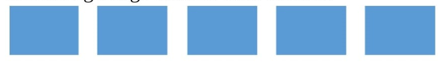

* Now use a list to merge these images together and the NumPy stack functionto display them vertically or horizontally. Think about how imshow reads the picture after this operation, what happend?

* Lastly, create trackbars do be able to live adjust the boundary values to find the optimal lower and upper value for all images.

## **<center><font style="color:rgb(100,109,254)">SOLUTION</font> </center>**


In [63]:

# Exercise 03: Binarization, image stacking, trackbars

import cv2 
import numpy as np

# as this is required by createTrackbar function
def nothing(x):
    pass

path ="C:\\Users\\hp\\Google Drive\\Fiverr Work\\2022\\15. Teaching OpenCV to Client\\Pics+scripts\\Pictures"

img = cv2.imread(path +"\\piece03.png")
img = cv2.resize(img, (220, 600))
imgGray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

cv2.namedWindow("stack", cv2.WINDOW_NORMAL)

cv2.createTrackbar('LB', 'stack', 0, 255, nothing)
cv2.createTrackbar('UB', 'stack', 255, 255, nothing)

while True:

    lb = cv2.getTrackbarPos('LB', 'stack')
    ub = cv2.getTrackbarPos('UB', 'stack')

    ret, thresh1 = cv2.threshold(imgGray, lb, ub, cv2.THRESH_BINARY)
    ret, thresh2 = cv2.threshold(imgGray, lb, ub, cv2.THRESH_BINARY_INV)
    ret, thresh3 = cv2.threshold(imgGray, lb, ub, cv2.THRESH_TRUNC)
    ret, thresh4 = cv2.threshold(imgGray, lb, ub, cv2.THRESH_TOZERO)
    ret, thresh5 = cv2.threshold(imgGray, lb, ub, cv2.THRESH_TOZERO_INV)

    # this print lower bound means threshold value
    # print(ret)
    
    # the window showing output images
    # with the corresponding thresholding
    # techniques applied to the input images

    hstackw = np.hstack((imgGray, thresh1,thresh2,thresh3,thresh4,thresh5))
    cv2.imshow("stack", hstackw)
    # cv2.imshow('Binary Threshold', thresh1)
    # cv2.imshow('Binary Threshold Inverted', thresh2)
    # cv2.imshow('Truncated Threshold', thresh3)
    # cv2.imshow('Set to 0', thresh4)
    # cv2.imshow('Set to 0 Inverted', thresh5)

    cv2.imshow("image", img)
    k = cv2.waitKey(1)
    if k == ord("q"):
        cv2.destroyAllWindows()
        break

cv2.destroyAllWindows()
    

## **<center><font style="color:rgb(100,109,254)">--------------</font> </center>**

*************